Tempo total:  113.47786140441895


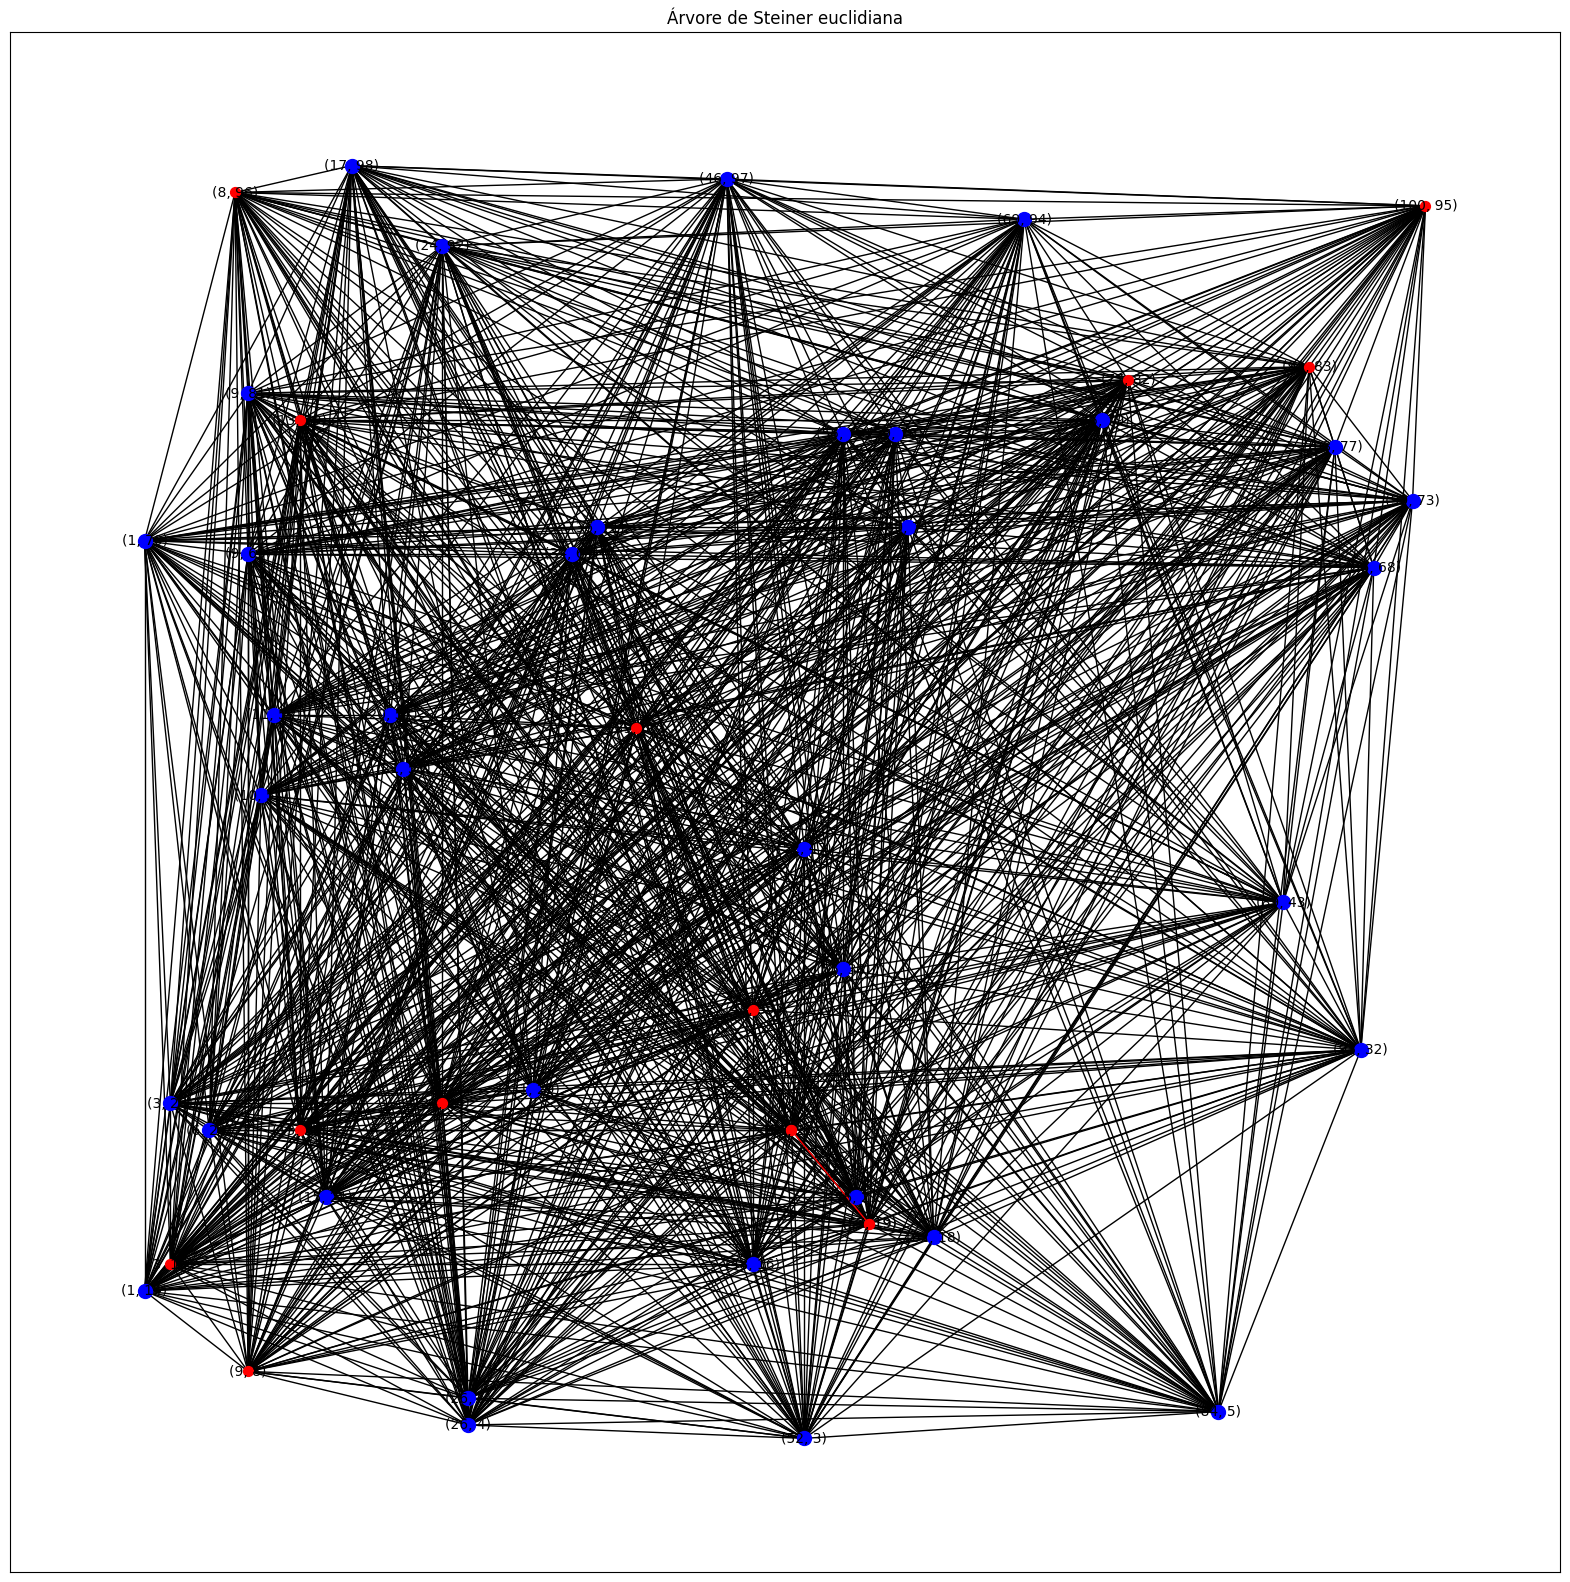

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools

def calcular_distancia_euclidiana(origem, destino):
    return math.sqrt((destino[0] - origem[0])**2 + (destino[1] - origem[1])**2)

def forca_bruta_steiner(G, origem, terminais):
    menor_custo = math.inf
    melhor_arvore = None

    for tamanho_subgrafo in range(2, len(terminais) + 1):  # Subconjuntos de tamanho 2 até o tamanho total
        for subgrafo in itertools.combinations(terminais, tamanho_subgrafo):
            # Construir uma árvore para o subconjunto atual
            arvore_atual = nx.Graph()

            for origem, destino in itertools.combinations(subgrafo, 2):
                caminho = nx.shortest_path(G, source=origem, target=destino, weight='peso')
                for i in range(len(caminho) - 1):
                    arvore_atual.add_edge(caminho[i], caminho[i+1], peso=G.edges[caminho[i], caminho[i+1]]['peso'])

            # Calcular o custo total da árvore
            custo_atual = sum(G.edges[edge]['peso'] for edge in arvore_atual.edges)

            # Atualizar se o custo atual for menor
            if custo_atual < menor_custo:
                menor_custo = custo_atual
                melhor_arvore = arvore_atual.copy()

    return melhor_arvore

quantidade_pontos = 50
quantidade_terminais = 13

pontos = []
for _ in range(quantidade_pontos):
    x = random.randint(0, 100)  # Gera um número aleatório entre 0 e 100 para a coordenada x
    y = random.randint(0, 100)  # Gera um número aleatório entre 0 e 100 para a coordenada y
    pontos.append((x, y))

G = nx.Graph() # Grafo original
G.add_nodes_from(pontos) # Adiciona o conjunto de pontos

terminais = random.sample(list(G.nodes()), quantidade_terminais)


G = nx.Graph() # Grafo original
G.add_nodes_from(pontos) # Adiciona o conjunto de pontos
# Fazer a busca entre a origem e todos os terminais, um a um
# Transforma os pontos originais em um grafo completo
for i, origem in enumerate(G.nodes()):
    for j, destino in enumerate(G.nodes()):
        if(j > i):
            distancia = calcular_distancia_euclidiana(origem, destino)
            G.add_edge(origem, destino, peso=distancia)
            
origem = terminais[0]

tempo_inicio = time.time()
min_arvore_steiner = forca_bruta_steiner(G, origem, terminais)
tempo_total = time.time() - tempo_inicio
print("Tempo total: ", tempo_total)


plt.figure(figsize=(20, 20))
position = {v: v for v in pontos}
nx.draw_networkx(G, pos=position, node_size=50, node_color='red', edge_color='black', font_size='10')
nx.draw_networkx(min_arvore_steiner, pos=position, node_size=50, node_color='red', edge_color='red', font_size='10')
labels = nx.get_edge_attributes(G, 'peso')
rounded_labels = {edge: f'{weight:.1f}' for edge, weight in labels.items()}


pontos_nao_terminais = [ponto for ponto in pontos if ponto not in terminais]
x_nao_terminais, y_nao_terminais = zip(*pontos_nao_terminais)

plt.scatter(x_nao_terminais, y_nao_terminais, color='blue', zorder=2, s=100)

plt.title('Árvore de Steiner euclidiana')
plt.show()